<a href="https://colab.research.google.com/github/Chanura04/ML-Coursework/blob/main/20240955.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import Libraries

In [85]:
!pip install keras-tuner 

In [86]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    roc_curve,
    classification_report,
    confusion_matrix
)

from imblearn.over_sampling import SMOTE
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, callbacks, models
SEED = 42
tf.random.set_seed(SEED)

## Load the dataset

In [87]:
url_x = "https://raw.githubusercontent.com/Chanura04/ML-Coursework/main/dataset/processed/set_02/X.csv"
url_y = "https://raw.githubusercontent.com/Chanura04/ML-Coursework/main/dataset/processed/set_02/y_data.csv"

## Check dataset behaviour

In [88]:
X=pd.read_csv(url_x)
y=pd.read_csv(url_y)
X.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,0,1,0,-1,0,1,0,0,...,1,0,0,1,0,0,0,0,1,0
1,0,0,0,34,1,0,1,0,1,0,...,1,0,0,0,1,0,0,0,0,1
2,0,0,0,2,1,0,1,1,0,0,...,1,0,0,1,0,0,0,0,0,1
3,0,0,0,45,0,-1,1,0,1,1,...,1,0,0,0,1,0,1,0,0,0
4,0,0,0,2,1,0,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0


In [89]:
X.dtypes.unique()

array([dtype('int64'), dtype('float64')], dtype=object)

In [90]:
X.columns

Index(['SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService',
       'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling',
       'MonthlyCharges', 'TotalCharges', 'AvgMonthlyCharge', 'IsNewCustomer',
       'IsHighCharge', 'Monthly_Tenure_Ratio', 'Total_Monthly_Ratio',
       'TotalServices', 'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [91]:
y.head()

,Churn
0,0
1,0
2,1
3,0
4,1


In [92]:
X.shape

(7043, 31)

In [93]:
y.shape

(7043, 1)

In [94]:
cols=[ 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges',
       'InternetService_Fiber optic', 'InternetService_No',
       'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'
       ]

if set(cols) == set(X.columns):
    print("All columns are present.")
else:
    missing = set(cols) - set(X.columns)
    extra = set(X.columns) - set(cols)
    if missing:
        print("Missing columns:", missing)
    if extra:
        print("Extra columns:", extra)

Extra columns: {'InternetService_DSL', 'IsNewCustomer', 'TotalServices', 'Monthly_Tenure_Ratio', 'AvgMonthlyCharge', 'Total_Monthly_Ratio', 'Contract_Month-to-month', 'IsHighCharge', 'PaymentMethod_Bank transfer (automatic)'}


### Split Data into Training, Validation, and Test Sets

In [95]:
X_train, X_temp, y_train, y_temp= train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
X_val, X_test, y_val, y_test= train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of X_val: {X_val.shape}")
print(f"Shape of y_val: {y_val.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of X_train: (4930, 31)
Shape of y_train: (4930, 1)
Shape of X_val: (1056, 31)
Shape of y_val: (1056, 1)
Shape of X_test: (1057, 31)
Shape of y_test: (1057, 1)


In [96]:
np.sum(y_val==1)

c:\Users\chanu\anaconda3\Lib\site-packages\numpy\_core\fromnumeric.py:84: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


Churn    280
dtype: int64

In [97]:
np.sum(y_val==0)

Churn    776
dtype: int64

In [98]:
# Initialize the scaler
scaler = StandardScaler()

# FIT AND TRANSFORM the training data 
X_train = scaler.fit_transform(X_train)

# TRANSFORM the test data 
X_test = scaler.transform(X_test)
X_val = scaler.transform(X_val)

In [99]:
X_train[0]

array([-0.43814715, -0.96295739, -0.65086184, -1.11472828,  0.33445908,
       -0.4980904 , -0.10182582, -0.17864867, -0.17914794, -0.10933053,
        1.08149216, -0.23031519, -1.20529512,  0.50428615, -0.83650447,
        0.15846124,  1.94586941,  1.2628289 ,  0.86704288, -1.11758834,
       -0.35455473, -0.72059725,  1.12453737, -0.52587133,  0.90731739,
       -0.51517027, -0.5647009 , -0.53152442, -0.52555704,  1.40735673,
       -0.54312331])

In [100]:
y_train = y_train.squeeze()    
y_val   = y_val.squeeze()
y_test  = y_test.squeeze()

Text(0.5, 1.0, 'Count Plot for Churn')

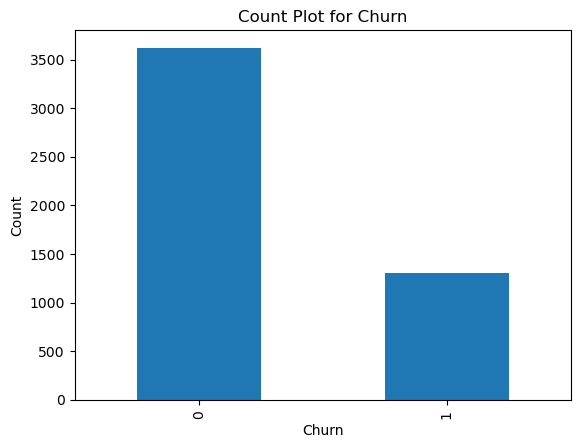

In [101]:
count=y_train.value_counts()
count.plot(kind='bar')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.title('Count Plot for Churn')

Text(0.5, 1.0, 'Count Plot for Churn')

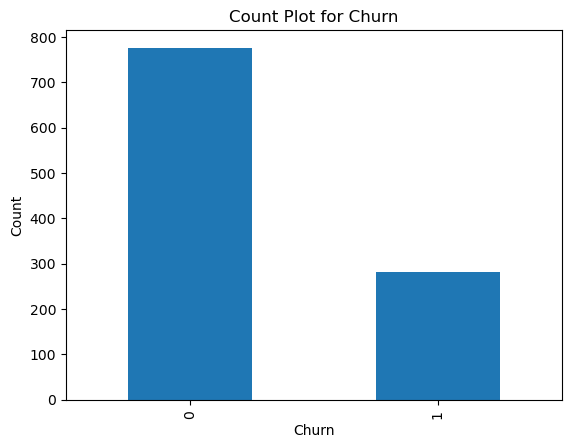

In [102]:
count=y_test.value_counts()
count.plot(kind='bar')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.title('Count Plot for Churn')

In [103]:
def plot_history(history):
    # Loss
    plt.figure(figsize=(18,6))
    plt.subplot(1,3,1)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title("Loss Curve")
    plt.xlabel("Epochs")
    plt.ylabel("Binary Crossentropy")
    plt.legend()


    # Accuracy
    plt.subplot(1,3,2)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title("Accuracy Curve")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.legend()


    # AUC
    plt.subplot(1,3,3)
    plt.plot(history.history['auc'], label='Train AUC')
    plt.plot(history.history['val_auc'], label='Validation AUC')
    plt.title("AUC Curve")
    plt.xlabel("Epochs")
    plt.ylabel("AUC Score")
    plt.legend()
    plt.show()


## Train Neural Network

#### Experiment 01

In [104]:
input_dim=X_train.shape[1]
input_dim

31

In [105]:
print("Final shape:", X_train.shape)

Final shape: (4930, 31)


In [106]:
len(X.columns)

31

In [107]:
import os
# os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
set_seed=42
os.environ['PYTHONHASHSEED'] = str(set_seed)

def create_final_model(input_dim):
    model = models.Sequential([
        layers.Input(shape=(input_dim,)),
        
        layers.Dense(64, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.4),

        layers.Dense(32, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.3),
    
        
        layers.Dense(16, activation='relu'),
        layers.Dropout(0.2),
        
        layers.Dense(1, activation='sigmoid')
    ])
    return model

# Build model
input_dim = X_train.shape[1]
model = create_final_model(input_dim)

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=[
        'accuracy',
        tf.keras.metrics.AUC(name='auc'),
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')
    ]
)
# Callbacks
callbacks_list = [
    callbacks.EarlyStopping(
        monitor='val_loss', patience=15, restore_best_weights=True, mode='min'
    ),
    callbacks.ReduceLROnPlateau(
        monitor='val_loss', factor=0.5, patience=8, min_lr=1e-7, mode='min'
    ),
    callbacks.ModelCheckpoint(
        'best_nn.h5', monitor='val_loss', save_best_only=True, mode='min'
    )
]

class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weight_dict = {0: class_weights[0], 1: class_weights[1]}
print("Class weights:", class_weight_dict)
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=200,
    batch_size=1024,
    callbacks=callbacks_list,
    class_weight=class_weight_dict,
    verbose=2
)

Class weights: {0: np.float64(0.680563224737714), 1: np.float64(1.8845565749235473)}
Epoch 1/200


5/5 - 2s - 449ms/step - accuracy: 0.4168 - auc: 0.4533 - loss: 0.9796 - precision: 0.2554 - recall: 0.6254 - val_accuracy: 0.3324 - val_auc: 0.4960 - val_loss: 0.8983 - val_precision: 0.2770 - val_recall: 0.9429 - learning_rate: 0.0010
Epoch 2/200


5/5 - 0s - 29ms/step - accuracy: 0.4590 - auc: 0.5574 - loss: 0.8320 - precision: 0.2894 - recall: 0.7141 - val_accuracy: 0.4072 - val_auc: 0.6782 - val_loss: 0.7681 - val_precision: 0.2993 - val_recall: 0.9214 - learning_rate: 0.0010
Epoch 3/200


5/5 - 0s - 24ms/step - accuracy: 0.5055 - auc: 0.6270 - loss: 0.7547 - precision: 0.3176 - recall: 0.7523 - val_accuracy: 0.5833 - val_auc: 0.7596 - val_loss: 0.6881 - val_precision: 0.3765 - val_recall: 0.8714 - learning_rate: 0.0010
Epoch 4/200


5/5 - 0s - 26ms/step - accuracy: 0.5467 - auc: 0.6901 - loss: 0.6989 - precision: 0.3442 - recall: 0.7829 - val_accuracy: 0.6667 - val_auc: 0.7892 - val_loss: 0.6312 - val_precision: 0.4321 - val_recall: 0.8179 - learning_rate: 0.0010
Epoch 5/200


5/5 - 0s - 25ms/step - accuracy: 0.5943 - auc: 0.7277 - loss: 0.6606 - precision: 0.3748 - recall: 0.7920 - val_accuracy: 0.7074 - val_auc: 0.8023 - val_loss: 0.5915 - val_precision: 0.4690 - val_recall: 0.7821 - learning_rate: 0.0010
Epoch 6/200


5/5 - 0s - 27ms/step - accuracy: 0.6237 - auc: 0.7450 - loss: 0.6303 - precision: 0.3963 - recall: 0.7989 - val_accuracy: 0.7386 - val_auc: 0.8101 - val_loss: 0.5631 - val_precision: 0.5047 - val_recall: 0.7607 - learning_rate: 0.0010
Epoch 7/200


5/5 - 0s - 25ms/step - accuracy: 0.6511 - auc: 0.7606 - loss: 0.6079 - precision: 0.4166 - recall: 0.7867 - val_accuracy: 0.7585 - val_auc: 0.8157 - val_loss: 0.5425 - val_precision: 0.5325 - val_recall: 0.7321 - learning_rate: 0.0010
Epoch 8/200


5/5 - 0s - 24ms/step - accuracy: 0.6661 - auc: 0.7692 - loss: 0.5988 - precision: 0.4283 - recall: 0.7722 - val_accuracy: 0.7661 - val_auc: 0.8202 - val_loss: 0.5269 - val_precision: 0.5447 - val_recall: 0.7179 - learning_rate: 0.0010
Epoch 9/200


5/5 - 0s - 28ms/step - accuracy: 0.6763 - auc: 0.7803 - loss: 0.5769 - precision: 0.4372 - recall: 0.7668 - val_accuracy: 0.7727 - val_auc: 0.8241 - val_loss: 0.5149 - val_precision: 0.5559 - val_recall: 0.7107 - learning_rate: 0.0010
Epoch 10/200


5/5 - 0s - 28ms/step - accuracy: 0.6897 - auc: 0.7818 - loss: 0.5732 - precision: 0.4495 - recall: 0.7561 - val_accuracy: 0.7746 - val_auc: 0.8276 - val_loss: 0.5057 - val_precision: 0.5600 - val_recall: 0.7000 - learning_rate: 0.0010
Epoch 11/200


5/5 - 0s - 27ms/step - accuracy: 0.6959 - auc: 0.7840 - loss: 0.5750 - precision: 0.4567 - recall: 0.7691 - val_accuracy: 0.7812 - val_auc: 0.8308 - val_loss: 0.4994 - val_precision: 0.5706 - val_recall: 0.7071 - learning_rate: 0.0010
Epoch 12/200


5/5 - 0s - 38ms/step - accuracy: 0.7087 - auc: 0.7949 - loss: 0.5602 - precision: 0.4706 - recall: 0.7821 - val_accuracy: 0.7803 - val_auc: 0.8334 - val_loss: 0.4941 - val_precision: 0.5686 - val_recall: 0.7107 - learning_rate: 0.0010
Epoch 13/200


5/5 - 0s - 21ms/step - accuracy: 0.7126 - auc: 0.8019 - loss: 0.5537 - precision: 0.4747 - recall: 0.7821 - val_accuracy: 0.7746 - val_auc: 0.8358 - val_loss: 0.4900 - val_precision: 0.5590 - val_recall: 0.7107 - learning_rate: 0.0010
Epoch 14/200


5/5 - 0s - 23ms/step - accuracy: 0.7116 - auc: 0.8000 - loss: 0.5506 - precision: 0.4730 - recall: 0.7638 - val_accuracy: 0.7718 - val_auc: 0.8377 - val_loss: 0.4868 - val_precision: 0.5534 - val_recall: 0.7214 - learning_rate: 0.0010
Epoch 15/200


5/5 - 0s - 24ms/step - accuracy: 0.7081 - auc: 0.8042 - loss: 0.5505 - precision: 0.4692 - recall: 0.7630 - val_accuracy: 0.7737 - val_auc: 0.8393 - val_loss: 0.4848 - val_precision: 0.5556 - val_recall: 0.7321 - learning_rate: 0.0010
Epoch 16/200


5/5 - 0s - 23ms/step - accuracy: 0.7207 - auc: 0.8068 - loss: 0.5405 - precision: 0.4838 - recall: 0.7859 - val_accuracy: 0.7699 - val_auc: 0.8405 - val_loss: 0.4830 - val_precision: 0.5493 - val_recall: 0.7357 - learning_rate: 0.0010
Epoch 17/200


5/5 - 0s - 29ms/step - accuracy: 0.7170 - auc: 0.8136 - loss: 0.5337 - precision: 0.4799 - recall: 0.7943 - val_accuracy: 0.7708 - val_auc: 0.8411 - val_loss: 0.4818 - val_precision: 0.5497 - val_recall: 0.7500 - learning_rate: 0.0010
Epoch 18/200


5/5 - 0s - 24ms/step - accuracy: 0.7138 - auc: 0.8069 - loss: 0.5380 - precision: 0.4759 - recall: 0.7760 - val_accuracy: 0.7708 - val_auc: 0.8415 - val_loss: 0.4814 - val_precision: 0.5490 - val_recall: 0.7607 - learning_rate: 0.0010
Epoch 19/200
5/5 - 0s - 19ms/step - accuracy: 0.7223 - auc: 0.8097 - loss: 0.5448 - precision: 0.4858 - recall: 0.7974 - val_accuracy: 0.7699 - val_auc: 0.8420 - val_loss: 0.4817 - val_precision: 0.5464 - val_recall: 0.7786 - learning_rate: 0.0010
Epoch 20/200
5/5 - 0s - 21ms/step - accuracy: 0.7144 - auc: 0.8157 - loss: 0.5320 - precision: 0.4769 - recall: 0.7898 - val_accuracy: 0.7661 - val_auc: 0.8426 - val_loss: 0.4822 - val_precision: 0.5407 - val_recall: 0.7821 - learning_rate: 0.0010
Epoch 21/200
5/5 - 0s - 20ms/step - accuracy: 0.7262 - auc: 0.8120 - loss: 0.5342 - precision: 0.4899 - recall: 0.7798 - val_accuracy: 0.7661 - val_auc: 0.8429 - val_loss: 0.4829 - val_precision: 0.5407 - val_recall: 0.7821 - learning_rate: 0.0010
Epoch 22/200
5/5 - 0s

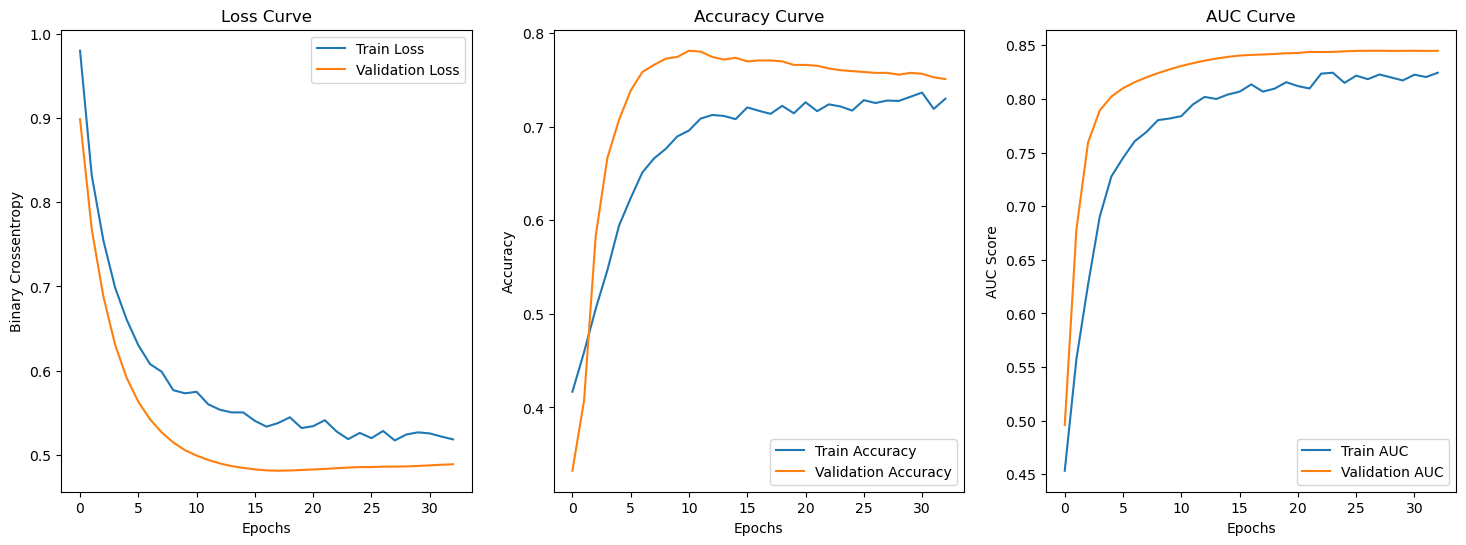

In [108]:
plot_history(history)

In [109]:
best_model_2 = keras.models.load_model('best_nn.h5')
test_results = best_model_2.evaluate(X_test, y_test, verbose=0)

training_accuracy_nn=test_results[1]


test_accuracy_nn=test_results[2]  
precision_nn=precision_score(y_test, (best_model_2.predict(X_test) >= 0.62).astype(int))
recall_nn=recall_score(y_test, (best_model_2.predict(X_test) >=  0.62).astype(int))

print(f"Test AUC: {roc_auc_score(y_test, best_model_2.predict(X_test)):.4f}")
print(f"Test Accuracy: {test_accuracy_nn:.4f}")
print(f"Test Precision: {precision_nn:.4f}")
print(f"Test Recall: {recall_nn:.4f}")

print("Classification Report:")
print(classification_report(y_test, (best_model_2.predict(X_test) >= 0.62).astype(int)))

34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 936us/step
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 852us/step
Test AUC: 0.8340
Test Accuracy: 0.8341
Test Precision: 0.6649
Test Recall: 0.4591
Classification Report:
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 895us/step
              precision    recall  f1-score   support

           0       0.82      0.92      0.87       776
           1       0.66      0.46      0.54       281

    accuracy                           0.79      1057
   macro avg       0.74      0.69      0.71      1057
weighted avg       0.78      0.79      0.78      1057



34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 861us/step


<Axes: >

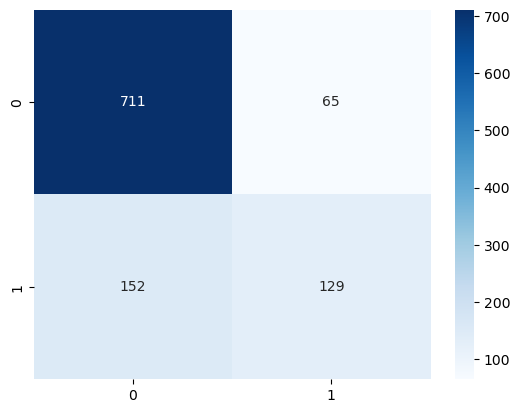

In [110]:
cm_nn=confusion_matrix(y_test, (best_model_2.predict(X_test) >= 0.62).astype(int))
sns.heatmap(cm_nn, annot=True, fmt='d', cmap='Blues')

34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


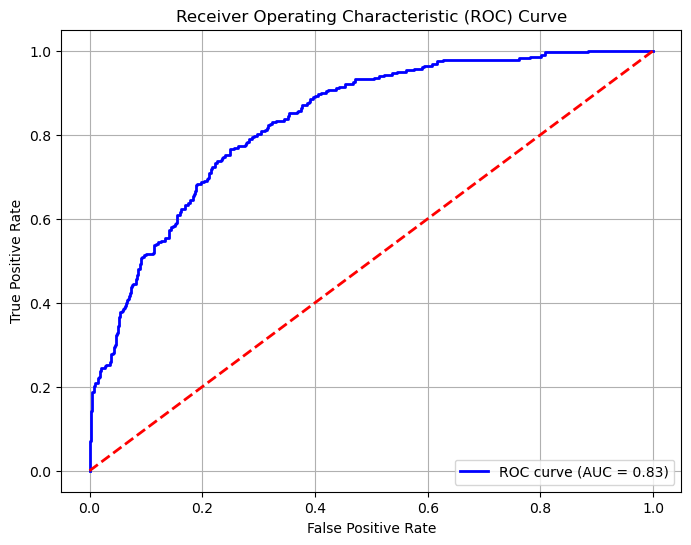

In [111]:
y_pred_prob_nn = model.predict(X_test).ravel()
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_nn)
roc_auc = roc_auc_score(y_test, y_pred_prob_nn)


plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')  # diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

## Best Decision Tree

In [112]:
url_x = "https://raw.githubusercontent.com/Chanura04/ML-Coursework/main/dataset/processed/set_02/X.csv"
url_y = "https://raw.githubusercontent.com/Chanura04/ML-Coursework/main/dataset/processed/set_02/y_data.csv"
X=pd.read_csv(url_x)
y=pd.read_csv(url_y)
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
y_train = y_train.squeeze()    
y_test  = y_test.squeeze()

In [113]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

In [134]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.tree import DecisionTreeClassifier
optimal_dt = DecisionTreeClassifier(
    criterion='gini',           # Faster, good impurity
    splitter='best',            # Exhaustive search per node
    max_depth=15,               # captures interactions
    min_samples_split=18,        
    min_samples_leaf=15,        
    max_features='sqrt',        # Reduce overfitting
    class_weight='balanced',    # Handle class imbalance
    random_state=42,
    ccp_alpha=0.0005,           # Cost complexity pruning
    min_impurity_decrease=0.001  # Extra regularization
)


kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

cv_scores = cross_val_score(
    optimal_dt,
    X_train_sm,
    y_train_sm,
    cv=kfold,
    scoring='accuracy'
)

print("Cross-Validation Accuracy Scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())

# Fit the model
optimal_dt.fit(X_train, y_train)


y_train_pred = optimal_dt.predict(X_train)
train_accuracy_dt = accuracy_score(y_train, y_train_pred)
print("Training Accuracy:", train_accuracy_dt)
precision_dt=precision_score(y_train, y_train_pred)
recall_dt=recall_score(y_train, y_train_pred)

y_proba_dt = optimal_dt.predict_proba(X_test)[:, 1]
optimal_threshold = 0.7165
y_pred_optimal = (y_proba_dt >= optimal_threshold).astype(int)

test_accuracy_dt = accuracy_score(y_test, y_pred_optimal)
roc_score_dt=roc_auc_score(y_test, y_proba_dt)
print("Test Accuracy:", test_accuracy_dt)

print("Test AUC:", roc_score_dt)
print("Classification Report:")
print(classification_report(y_test, y_pred_optimal))

Cross-Validation Accuracy Scores: [0.80253623 0.80193237 0.79710145 0.80785498 0.8102719 ]
Mean CV Accuracy: 0.8039393873053402
Training Accuracy: 0.7603833865814696
Test Accuracy: 0.7622427253371186
Test AUC: 0.8162714097496706
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.79      0.83      1035
           1       0.54      0.69      0.61       374

    accuracy                           0.76      1409
   macro avg       0.71      0.74      0.72      1409
weighted avg       0.79      0.76      0.77      1409



Text(0.5, 25.722222222222214, 'Predicted')

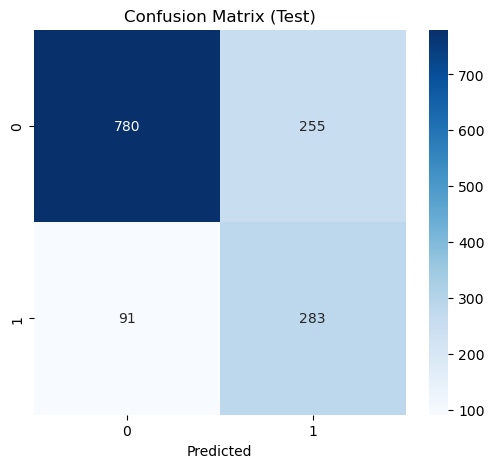

In [115]:
cm_dt = confusion_matrix(y_test, (optimal_dt.predict(X_test) >=optimal_threshold).astype(int))
plt.figure(figsize=(6,5))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix (Test)")
plt.xlabel("Predicted")

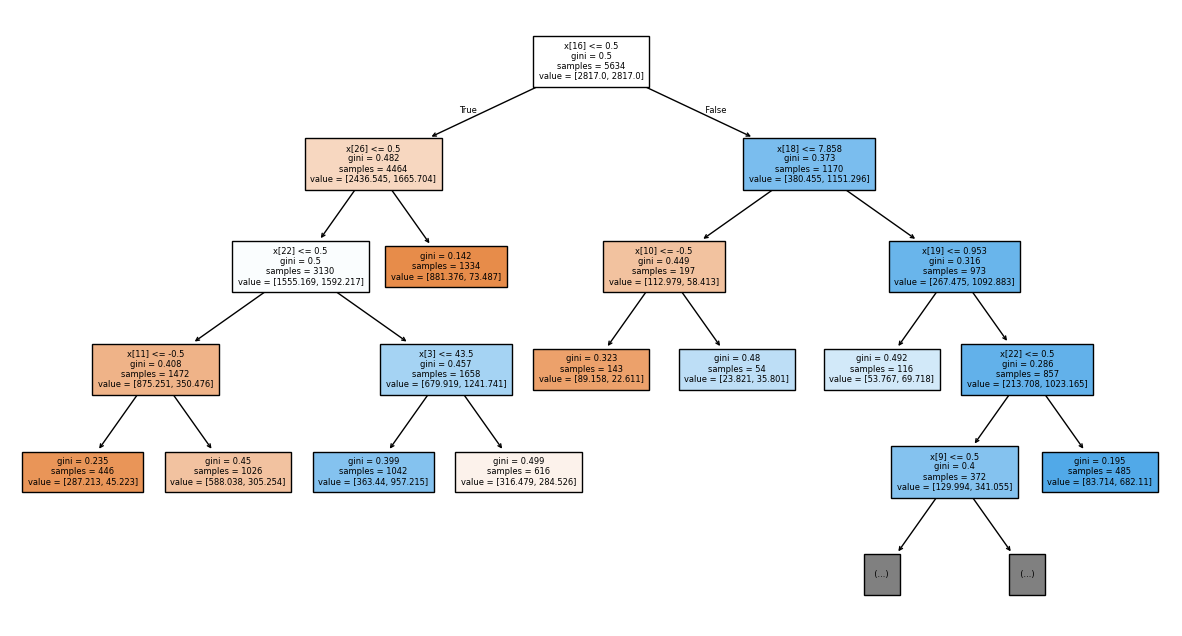

In [116]:
from sklearn import tree
plt.figure(figsize=(15, 8))
tree.plot_tree(optimal_dt, filled=True, fontsize=6, max_depth=4)
plt.show()

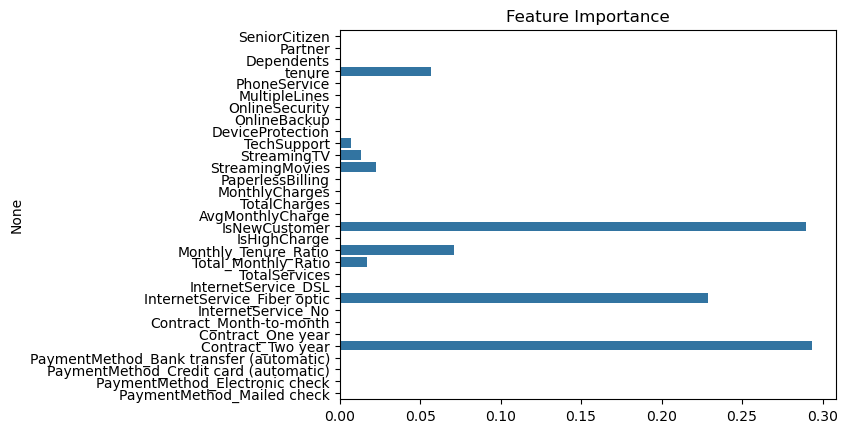

In [117]:
importances = optimal_dt.feature_importances_
features = X_train.columns

sns.barplot(x=importances, y=features)
plt.title("Feature Importance")
plt.show()

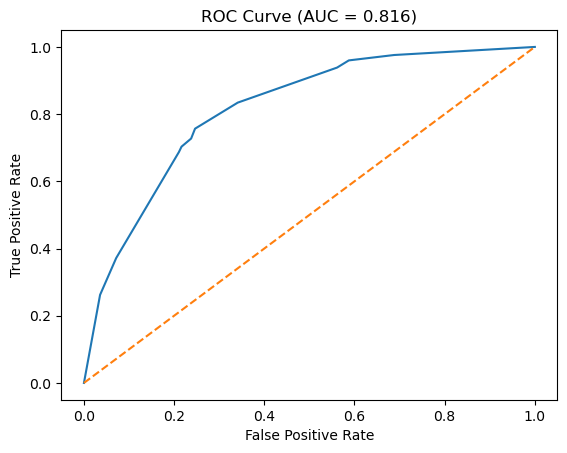

In [118]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, _ = roc_curve(y_test  , y_proba_dt )
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr)
plt.plot([0,1], [0,1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title(f"ROC Curve (AUC = {roc_auc:.3f})")
plt.show()